In [1]:
%reset -f

In [2]:
import numpy as np
import time
from numpy import linalg as la
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Paramètres

In [3]:
I = 100
N = 100000
h = 1.0/I
T = 2
deltat = T/N

In [4]:
deltat<h**2/2,deltat,h**2/2

(True, 2e-05, 5e-05)

# u(x,t)

In [5]:
def u(x,t):
    return np.cos(x+t)*np.exp(x-t)

# f(x,t)

In [6]:
def f(x,t):
    return np.exp(x-t)*(np.sin(x+t)-np.cos(x+t))

# alpha(t)

In [7]:
def alpha(t):
    return u(0,t)

# beta(t)

In [8]:
def beta(t):
    return u(1,t)

# Schéma d'Euler Explicite

N = 100000 et h = 0.01
L'erreur est de : 4.111118545313541e-07


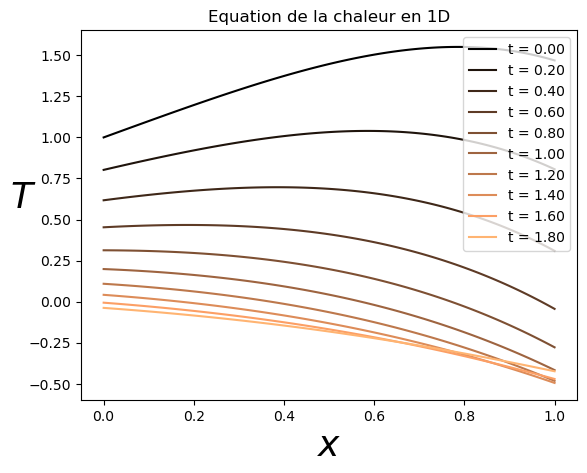

In [9]:
# Vectorise
x = np.arange(0,I+1)*h
t = np.arange(0,N)*deltat

Uold = u(x,0)
Unew = np.zeros(Uold.shape)

for k in range(N):
    Unew[0] = alpha((k+1)*deltat)
    Unew[-1] = beta((k+1)*deltat)
    Unew[1:-1] = Uold[1:-1] + deltat*(f(x[1:-1],t[k]) + (Uold[2:] - 2*Uold[1:-1] + Uold[:-2])/h**2)
    Uold = Unew.copy()
    
    if (k%(N/10) == 0):
        plotlabel = "t = %1.2f" %(k*deltat)
        plt.plot(x, Unew, label=plotlabel, color=plt.get_cmap('copper')(float(k)/N))

plt.xlabel(u'$x$', fontsize=26)
plt.ylabel(u'$T$', fontsize=26, rotation=0)
plt.title(u'Equation de la chaleur en 1D')
plt.legend()

print(f"N = {N} et h = {h}")
print(f"L'erreur est de : {la.norm(Unew-u(x,T),np.inf)}")

# Schéma d'Euler Implicite

In [19]:
I = 100
N = 1000
h = 1.0/I
T = 2
deltat = T/N

N = 1000 et h = 0.01
L'erreur est de : 4.142799934250818e-05


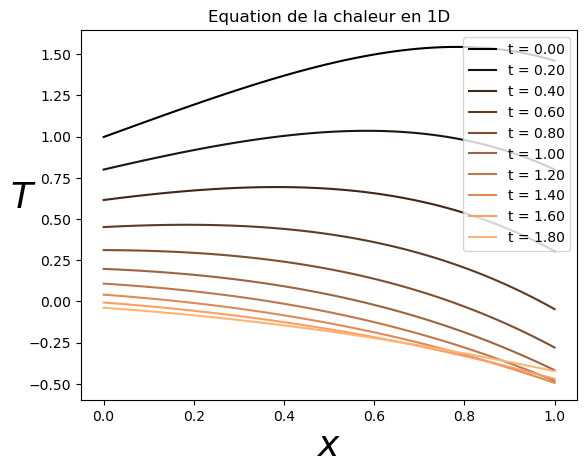

In [21]:
# Vectorise
x = np.arange(0,I+1)*h
t = np.arange(0,N)*deltat

d = 1 + 2*deltat/h**2
v = -deltat/h**2
l = -deltat/h**2

offsets = np.array([-1,0,1])
data = [l*np.ones(I+1), d*np.ones(I+1), v*np.ones(I+1)]

A = sp.dia_matrix((data,offsets), shape=(I+1,I+1))
A = sp.csc_matrix(A)
A[0,0],A[0,1] = 1,0
A[-1,-1],A[-1,-2] = 1,0

Uold = u(x,0)
Unew = np.zeros(Uold.shape)

for k in range(N):
    b = np.zeros(I+1)
    b[0] = alpha((k+1)*deltat)
    b[-1] = beta((k+1)*deltat)
    b[1:-1] = deltat*f(x[1:-1],(k+1)*deltat)
    b[1:-1] += Uold[1:-1]

    Unew = spsolve(A,b)
    Uold = Unew.copy()
    if (k%(N/10) == 0):
        plotlabel = "t = %1.2f" %(k*deltat)
        plt.plot(x, Unew, label=plotlabel, color=plt.get_cmap('copper')(float(k)/N))

plt.xlabel(u'$x$', fontsize=26)
plt.ylabel(u'$T$', fontsize=26, rotation=0)
plt.title(u'Equation de la chaleur en 1D')
plt.legend()

print(f"N = {N} et h = {h}")
print(f"L'erreur est de : {la.norm(Unew-u(x,T),np.inf)}")